$$
\def\CC{\bf C}
\def\QQ{\bf Q}
\def\RR{\bf R}
\def\ZZ{\bf Z}
\def\NN{\bf N}
$$

## Práctica nº 4. Matemáticas I de Ingeniería Informática

En esta práctica estudiamos aspectos de funciones reales de variable real donde intervienen los conceptos de límite, continuidad y derivada, con aplicación al cálculo de soluciones de ecuaciones. Las órdenes más usadas serán las siguientes:

-   limit(f(x),x=a) . Calcula el $\displaystyle \lim_{x\to a} f(x)$. Aquí $a$ puede ser un número real y también $a=+\infty$ ( a =oo) o $a=-\infty$ ( a=-oo ).
-   diff(f(x),x), diff(f(x),x,x) (o diff(f(x),x,2)),... Son las derivadas primera, segunda, ... de una función $f(x)$
-   *find\_root* . Para encontrar soluciones (aproximadas) de ecuaciones.

Con estas órdenes y alguna más que puede aparecer ocasionalmente, pasamos a desarrollar ejemplos en los que Sage nos puede resultar especialmente útil.

**Ejemplo 1:** Hallar las derivadas primera, segunda y tercera de la función

$$ f(x)=-\sqrt{3} \arctan \frac{2x + 1}{\sqrt{3}} - \log(x - 1) + \log\sqrt{x^2 + x + 1}, $$

simplificando lo que se pueda los resultados.

In [1]:
reset()
f(x)=-sqrt(3)*arctan((2*x + 1)/sqrt(3)) - log(x - 1) + log(sqrt(x^2 + x + 1))
f(x).show()

-sqrt(3)*arctan(1/3*sqrt(3)*(2*x + 1)) - log(x - 1) + log(sqrt(x^2 + x + 1))

In [2]:
diff(f(x),x).show() # esta es la derivada

1/2*(2*x + 1)/(x^2 + x + 1) - 6/((2*x + 1)^2 + 3) - 1/(x - 1)

In [3]:
diff(f(x),x,x).show() # derivada segunda, también diff(f(x),x,2)

-1/2*(2*x + 1)^2/(x^2 + x + 1)^2 + 1/(x^2 + x + 1) + 24*(2*x + 1)/((2*x + 1)^2 + 3)^2 + 1/(x - 1)^2

In [4]:
diff(f(x),x,x,x).show() # derivada tercera, también diff(f(x),x,3)

(2*x + 1)^3/(x^2 + x + 1)^3 - 3*(2*x + 1)/(x^2 + x + 1)^2 - 192*(2*x + 1)^2/((2*x + 1)^2 + 3)^3 + 48/((2*x + 1)^2 + 3)^2 - 2/(x - 1)^3

Conviene, para posibles cálculos sucesivos, introducir las derivadas como funciones. Aquí las llamamos fprima, fsegunda y ftercera, y las simplificamos:

In [5]:
fprima(x)=diff(f(x),x).full_simplify()
fsegunda(x)=diff(f(x),x,x).full_simplify()
ftercera(x)=diff(f(x),x,x,x).full_simplify()
show([fprima(x),fsegunda(x),ftercera(x)])

[-3*x/(x^3 - 1),
 3*(2*x^3 + 1)/(x^6 - 2*x^3 + 1),
 -18*(x^5 + 2*x^2)/(x^9 - 3*x^6 + 3*x^3 - 1)]

**Ejemplo 2:**Dibujar la función $f(x)=x^3+1$ en un entorno del punto $x=1/3$ junto con la recta tangente en dicho punto.

Recordamos que la ecuación de la recta tangente en un punto $(a,f(a))$ es $\displaystyle y=f(a)+f'(a)(x-a)$. La disposición de los cálculos es sencilla:

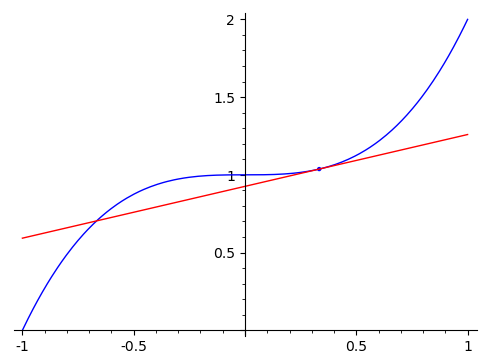

In [6]:
reset()
f(x)=x^3+1
f1(x)=diff(f(x),x)
y(x)=f(1/3)+f1(1/3)*(x-1/3)
A=plot(f(x),(x,-1,1))
B=plot(y(x),(x,-1,1),color='red')
P=point([(1/3,f(1/3))],pointsize=10)
(A+B+P).show(figsize=5)

**Ejemplo 3:** Calcular los máximos y mínimos relativos de la función $f(x)=(2x^2-3x)e^{2x^2-3x}$ en el intervalo $[-\frac{1}{2},2]$. Encontrar los intervalos donde la función es creciente o decreciente. Calcular los máximos y mínimos absolutos de $f(x)$ en el intervalo $[-\frac{1}{2},2]$. Corroborar los resultados con gráficas de $f$ y $f'$.

In [7]:
reset()
f(x)=(2*x**2-3*x)*exp(2*x**2-3*x)
f1(x)=diff(f(x),x)
solve(f1(x)==0,x)

[x == 1, x == (1/2), x == (3/4)]

In [8]:
f2(x)=diff(f(x),x,x)
[f2(1),f2(1/2),f2(3/4)]

[e^(-1), e^(-1), -1/2*e^(-9/8)]

Viendo el signo de la derivada segunda, descubrimos que $1$ y $1/2$ son mínimos, y $3/4$ máximo. Dibujemos en un entorno amplio que contenga estos puntos, por ejemplo $[-1/2,3/2]$, y veamos qué ocurre:

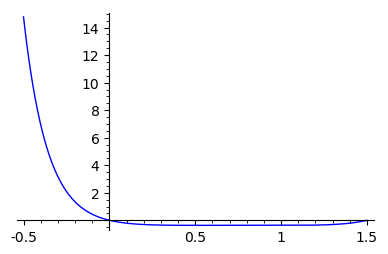

In [9]:
plot(f(x),(x,-1/2,3/2),figsize=4)

No distinguimos los máximos y mínimos, porque la función toma valores muy parecidos en $(0,1.5)$. Dibujando en un entorno más pequeño, por ejemplo, el intervalo $[1/4,5/4]$, distinguimos los máximos y mínimos:

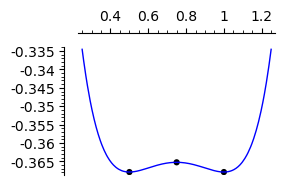

In [10]:
A=plot(f(x),(x,1/4,5/4))
B=points([(1,f(1)),(1/2,f(1/2)),(3/4,f(3/4))],pointsize=20,color='black')
(A+B).show(figsize=3)

Los dos siguientes recuadros muestran que la función es decreciente (derivada negativa) en $(-\infty,1/2)$ y en $(3/4,1)$. Y creciente (derivada positiva) en $(1/2,3/4)$ y en $(1,+\infty)$ (aunque con las gráficas anteriores podríamos habernos percatado ya de este hecho):

In [11]:
solve(f1(x)<0,x)

[[(3/4) < x, x < 1], [x < (1/2)]]

In [12]:
solve(f1(x)>0,x)

[[1 < x], [(1/2) < x, x < (3/4)]]

Si Sage no hubiera sabido resolver dónde $f'$ es positiva y negativa, se podría dibujar la derivada:

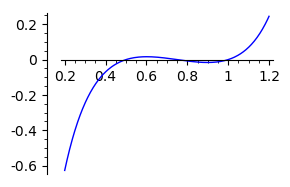

In [13]:
plot(f1(x),(x,0.2,1.2),figsize=3)

Para encontrar los extremos absolutos en $[-1/2,2]$ dibujamos y observamos que el máximo absoluto está en uno de los dos extremos (o en los dos a la vez). También sabemos que el mínimo absoluto estará en $1/2$ o $1$ (o en los dos a la vez) porque $1/2$ y $1$ son los mínimos relativos que habíamos hallado antes (aunque en la gráfica no se aprecia).

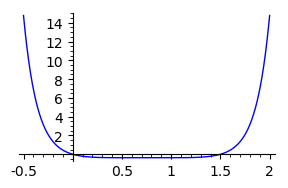

In [14]:
plot(f(x),(x,-1/2,2),figsize=3)

La siguiente cuenta nos asegura que en $-1/2$ y $2$ se alcanza el máximo absoluto de la función (que es $2e^2$) y en $1/2$ y $1$ el mínimo absoluto (que es $-1/e$):

In [15]:
f(-1/2),f(2),f(1/2),f(1)

(2*e^2, 2*e^2, -e^(-1), -e^(-1))

**Nota.** Con la orden factor aplicada a la derivada (si funciona), también podemos ver fácilmente los ceros y cambios de signo. En nuestro caso funciona:

In [16]:
f1(x).factor().show()

(4*x - 3)*(2*x - 1)*(x - 1)*e^(2*x^2 - 3*x)

**Ejemplo 4:**Para la función del ejemplo anterior, encontrar los intervalos donde es cóncava o convexa y sus puntos de inflexión.

Tendremos que analizar los ceros y cambios de signo de la derivada segunda: \**\**

In [17]:
f2(x).factor().show()

(32*x^4 - 96*x^3 + 130*x^2 - 87*x + 22)*e^(2*x^2 - 3*x)

La orden factor no funciona. Hallamos los ceros y viéndolos de forma aproximada, observamos que solo hay dos raíces reales.

In [18]:
solve(32*x^4-96*x^3+130*x^2-87*x+22==0,x)

[x == -1/2*sqrt(-1/8*sqrt(137) - 11/8) + 3/4, x == 1/2*sqrt(-1/8*sqrt(137) - 11/8) + 3/4, x == -1/4*sqrt(1/2)*sqrt(sqrt(137) - 11) + 3/4, x == 1/4*sqrt(1/2)*sqrt(sqrt(137) - 11) + 3/4]

In [32]:
show((-1/2*sqrt(-1/8*sqrt(137) - 11/8) + 3/4))
show((1/2*sqrt(-1/8*sqrt(137) - 11/8) + 3/4))
show((-1/2*sqrt(1/8*sqrt(137) -11/8) + 3/4))
show((1/2*sqrt(1/8*sqrt(137) - 11/8) + 3/4))

show((-1/2*sqrt(-1/8*sqrt(137) - 11/8) + 3/4).n())
show((1/2*sqrt(-1/8*sqrt(137) - 11/8) + 3/4).n())
show((-1/2*sqrt(1/8*sqrt(137) -11/8) + 3/4).n())
show((1/2*sqrt(1/8*sqrt(137) - 11/8) + 3/4).n())

-1/2*sqrt(-1/8*sqrt(137) - 11/8) + 3/4

1/2*sqrt(-1/8*sqrt(137) - 11/8) + 3/4

-1/4*sqrt(1/2)*sqrt(sqrt(137) - 11) + 3/4

1/4*sqrt(1/2)*sqrt(sqrt(137) - 11) + 3/4

0.750000000000000 - 0.842331212890742*I

0.750000000000000 + 0.842331212890742*I

0.601602317369885

0.898397682630115

Dibujamos la derivada segunda y observando su signo podemos deducir que $f$ es convexa en $(-\infty,0.601...)$ y en $(0.898...,+\infty)$ y cóncava en $(0.601...,0.898...)$ y esos dos puntos son puntos de inflexión.

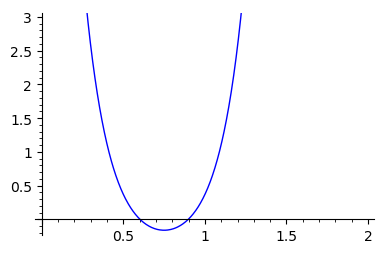

In [33]:
plot(f2(x),(x,0,2),ymax=3,figsize=4)

**Ejemplo 5:** Sea la función $\displaystyle f(t)=\frac{\sin t -t}{t^3},\ t\not=0$. Analizar si se puede extender a una función continua en $t=0$. Estudiar si esta extensión es una función derivable en $t=0$ y escribir la función derivada.

La función no está definida en $t=0$ pues no podemos dividir por cero:

In [34]:
reset()
var('t')
f(t)=(sin(t)-t)/t^3
f(0)

ValueError: power::eval(): division by zero

Sin embargo, abajo vemos que existe el límite cuando $t$ tiende a $0$ y es $-1/6$ :

In [35]:
limit(f(t),t=0)

-1/6

Por tanto, definiendo $f(0)=-1/6$, tendremos una función continua. La derivada en puntos distintos de $0$, la obtenemos con la orden diff; y en $0$ con la definición $\displaystyle \lim_{t\to 0}\frac{f(t)-f(0)}{t}$ (que vemos que existe):

In [36]:
f1(t)=diff(f(t),t)
f1(t).show()
limit((f(t)+1/6)/t,t=0)

(cos(t) - 1)/t^3 + 3*(t - sin(t))/t^4

0

**Ejemplo 6 (sobre asíntotas):**

Las órdenes que ya conocemos nos permiten dibujar la gráfica de una función, ver dónde crece y dónde decrece, calcular los máximos y mínimos, concavidad, convexidad... También podemos calcular sus asíntotas; lo vemos con un ejemplo: la función

$$ f(x) = \frac{x^3 \arctan x + 2x + 1}{5x^2+3}. $$

In [37]:
reset()
var('x')
f(x)=(x^3*arctan(x)+2*x+1)/(5*x^2+3)
f(x).show()

(x^3*arctan(x) + 2*x + 1)/(5*x^2 + 3)

La asíntota en $+\infty$ es la recta $y = ax+b$, donde

$$a=\lim_{x\to +\infty} \frac{f(x)}{x}, \quad b=\lim_{x\to +\infty} (f(x) - ax).$$

Si alguno de los dos límites no existe o es $\pm\infty$, entonces la función no tiene asíntota en $+\infty$. Haciendo los mismos límites en $-\infty$ obtenemos la asíntota en $-\infty$, si es que existe.

In [38]:
limit(f(x)/x,x=oo)

1/10*pi

In [39]:
limit(f(x)-1/10*pi*x,x=oo)

-1/5

Según lo anterior, la recta $y=\frac{\pi}{10} x - \frac{1}{5}$ es la asíntota en $+\infty$. Veamos ahora en $-\infty$ :

In [40]:
limit(f(x)/x,x=-oo)

-1/10*pi

In [41]:
limit(f(x)+1/10*pi*x,x=-oo)

-1/5

Es decir, la recta $y=-\frac{\pi}{10} x - \frac{1}{5}$ es la asíntota en $-\infty$. Dibujamos la función y las dos rectas en un intervalo suficientemente grande:

In [42]:
gf=plot(f(x),(x,-10,5),color='blue')
as1=plot(1/10*pi*x-1/5,(x,0,5),color='red',linestyle='dashed')
as2=plot(-1/10*pi*x-1/5,(x,-10,0),color='red',linestyle='dashed')

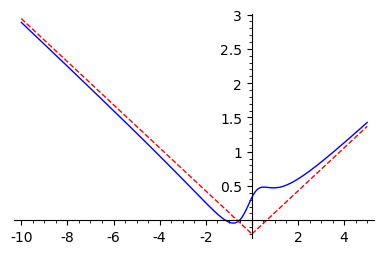

In [43]:
(gf+as1+as2).show(figsize=4)

**Ceros de funciones.**Dada una función $f(x)$, para encontrar ceros, es decir, puntos $x$ tal que $f(x)=0$, podemos intentar solve(f(x)==0,x) con algunas de sus opciones, pero a poco complicada que sea la función $f(x)$ este procedimiento no funcionará. Sin embargo, siempre podemos hacer gráficas de $f(x)$ y observar los cortes con el eje OX; esto nos dará los ceros de forma aproximada. También es muy útil la orden find\_root que encuentra ceros de forma aproximada en el intervalo que indiquemos. Del mismo modo podemos buscar puntos $x$ que cumplen $f_1(x)=f_2(x)$ buscando los ceros de la diferencia $f_1(x)-f_2(x)$. A continuación desarrollamos un ejemplo.

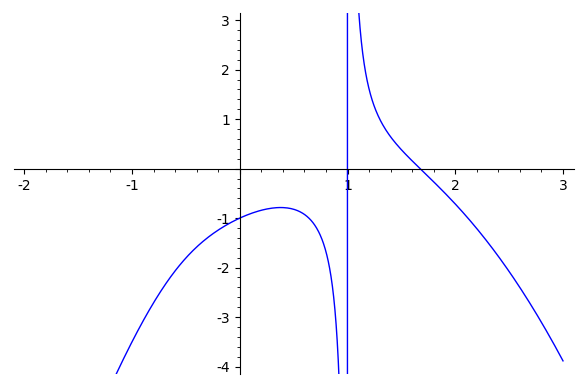

In [57]:
f(x)=x/(x^3-1)
h(x)=(x-1)^2
plot(f(x)-h(x),x,-2,3,ymin=-4,ymax=3)

In [58]:
show(f(x)==h(x))
show(solve(f(x)-h(x)==0,x,to_poly_solve=True))

x/(x^3 - 1) == (x - 1)^2

[x == 1.673648648648649,
 x == (-0.4472842024461323 - 0.7532396951123452*I),
 x == (0.6104599292962123 - 0.6371060924265736*I),
 x == (0.6104599292962123 + 0.6371060924265736*I),
 x == (-0.4472842024461323 + 0.7532396951123452*I)]

Observamos que solve nos ha dado el punto de corte $x = 1.67364864865 $ (los otros valores son complejos). Este punto lo podemos observar en la gráfica anterior. Si hubiéramos hecho primero la gráfica, habríamos visto con claridad que el punto se encuentra entre $1$ y $2$ (podríamos afinar más si fuera necesario). Entonces, otra forma de encontrar este punto es:

In [59]:
find_root(h(x)-f(x),1,2) # o (h(x)-f(x)).find_root(1,2)

1.6736485462998454

**Ejemplo 7:**Observar gráficamente que la ecuación $10\sin x=x$ tiene tres soluciones en el intervalo $\displaystyle (0,4\pi)$. Sin la gráfica, ¿cómo demostrarías que tiene exactamente 3 soluciones?. Hallarlas de forma aproximada.

In [60]:
reset()
solve(10*sin(x)-x==0,x) # no sabe resolver

[x == 10*sin(x)]

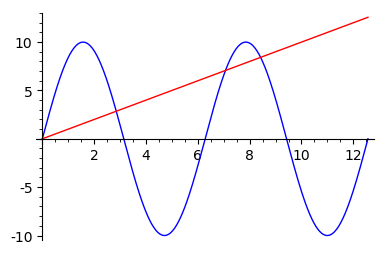

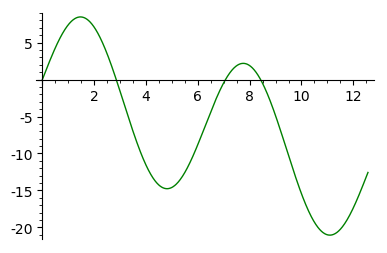

In [61]:
a=plot(10*sin(x),(x,0,4*pi))
b=plot(x,(x,0,4*pi),color='red')
(a+b).show(figsize=4)
plot(10*sin(x)-x,(x,0,4*pi),color='green',figsize=4)# Esta es otra forma de ver el problema

La solución $x=0$ no forma parte del intervalo que nos preguntan. Examinando la gráfica, sabemos aproximadamente qué intervalos poner en la orden find\_root:

In [62]:
x1=find_root(10*sin(x)-x,2,4)
x2=find_root(10*sin(x)-x,6,8)
x3=find_root(10*sin(x)-x,8,10)
show([x1,x2,x3])

[2.8523418944500625, 7.068174358095817, 8.423203932360492]

10*cos(x) - 1

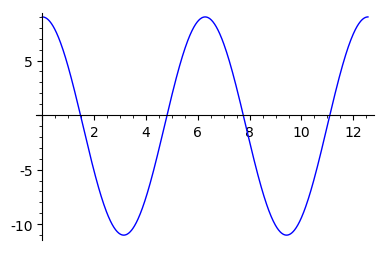

In [63]:
reset()
f(x)=10*sin(x)-x
diff(f(x),x).show()
plot(diff(f(x),x),(x,0,4*pi), figsize=4)

In [64]:
solve(10*cos(x)-1==0,x)# Tan sólo nos da una solución.

[x == arccos(1/10)]

In [68]:
(arccos(1/10)).n()# Esta es una solución, ¿cuales son las demás?

1.47062890563334

In [74]:
show(f(arccos(1/10)).n())
show(f(arccos(1/10)+pi).n())
show(f(arccos(1/10)+2*pi).n())
show(f(arccos(1/10)+3*pi).n())
show(f(4*pi).n())

-1.82838249046845

334.499683228664

3266.63498178622

13395.6742322170

24006.8116528144

1/4*pi

Los extremos relativos cambian de signo, lo que significa que hay una única solución de nuestra ecuación entre éllos.

**Ejemplo 8.**El método de Newton permite aproximar soluciones de ecuaciones del tipo $f(x)=0$. A priori, el método no asegura la convergencia hacia alguna solución. EL método de Newton consiste en construir la sucesión $x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$ y estudiar si converge o no. Si lo hace, es hacia una solución de $f(x)=0$. El siguiente ejemplo sirve de ilustración.El polinomio $p (x) = x^4 - 6x^2 + x + 5$ tiene cuatro raíces reales. Comprobar que con $x_0=0$ el método de Newton converge a la raíz más cerca de $-2$.

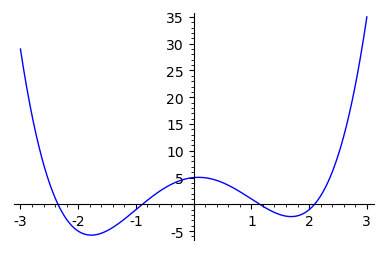

In [69]:
f(x)=x^4-6*x^2+x+5
plot(f(x),x,-3,3, figsize=4) #se observan las 4 soluciones

In [70]:
fprima(x)=diff(f(x),x)
a0=0
a1=a0-(f(a0)/fprima(a0))
print(a0)
print(a1)

0
-5


In [71]:
fprima(x)=diff(f(x),x)
a0=0
a2=a1-(f(a1)/fprima(a1))
print(a1)
print(a2.n())

-5
-3.91799544419134


In [73]:
a=[0]
for n in [1..10]:
    a.append(a[n-1]-(f(a[n-1])/fprima(a[n-1])).n())
show(a[10].n())
show(list(a))

-2.34942693527723

[0,
 -5.00000000000000,
 -3.91799544419134,
 -3.16694805728908,
 -2.68712701380716,
 -2.43633031925806,
 -2.35729793861145,
 -2.34950003482378,
 -2.34942694166568,
 -2.34942693527723,
 -2.34942693527723]